In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
%matplotlib inline

# Bootstrapping

Una parte central de cualquier modelo estadístico es poder calcular la incertidumbre asociada a sus parámetros.
En los métodos MCMC las incertidumbres se pueden calcular numéricamente. ¿Pero qué hacer con otros métodos que no son Bayesianos?

Una de las posibilidades es utilizar el bootstrap. El poder de este método es que es aplicable cuando no hay herramientas analíticas
disponibles. Además es muy fácil de implementar. En el bootstrap se toman los datos originales y se toman subconjuntos de manera
aleatoria. Cada uno de estos subconjuntos se procesa bajo el método de interés. De esta manera, para cada subconjunto de datos
hay unos parámetros estimados. Al final se hacen los histogramas de los parámetros obtenidos de los diferentes conjuntos y estos
van a dar una idea de las incertidumbres.

Esto proceso no es necesario con un método como mínimos cuadrados porque para este método
ya hay estimadores para las incertidumbres, de todas formas vamos a utilizarlo para demostrar el uso de bootstraping.

Vamos a volver a los datos de precios de carros.

In [2]:
data = pd.read_csv('../06.RegresionLineal/Cars93.csv')

Vamos a ajustar el modelo lineal `Price` = $\beta_0$ + $\beta_1\times$ `Horsepower` + $\beta_2\times$ `Turn.circle`

In [3]:
X = data[['Horsepower', 'Turn.circle']]
Y = data['Price'].values.reshape(-1,1)

Ahora vamos a dividir los datos en 2 grupos: `test` y `validation`. Para eso usamos `sklearn.model_selection.train_test_split`

In [4]:
import sklearn.model_selection

In [5]:
X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)

`train` vamos a usarlo para encontrar los $\beta_i$ y `validation` para medir $R^2$. 

In [8]:
linear = sklearn.linear_model.LinearRegression()
linear.fit(X_train, Y_train)
beta0 = linear.intercept_[0]
beta1 = linear.coef_[0][0]
beta2 = linear.coef_[0][0]
r2_train = linear.score(X_train, Y_train)
r2_validation = linear.score(X_validation, Y_validation) 
print('betas:', beta0, beta1, beta2)
print('R2 (train vs. validation)', r2_train, r2_validation)

betas: -6.75617149169 0.122511646946 0.122511646946
R2 (train vs. validation) 0.593180075304 0.608827484674


Esto lo podemos repetir muchas veces

In [10]:
for i in range(10):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta0 = linear.intercept_[0]
    beta1 = linear.coef_[0][0]
    beta2 = linear.coef_[0][0]
    r2_train = linear.score(X_train, Y_train)
    r2_validation = linear.score(X_validation, Y_validation) 
    print('ITERACION ', i)
    print('\t betas:', beta0, beta1, beta2)
    print('\t R2 (train vs. validation)', r2_train, r2_validation)
    

ITERACION  0
	 betas: -6.14082262937 0.116471672056 0.116471672056
	 R2 (train vs. validation) 0.735009008873 0.496801035219
ITERACION  1
	 betas: -4.44964352632 0.115801113758 0.115801113758
	 R2 (train vs. validation) 0.605925009142 0.584032043103
ITERACION  2
	 betas: 17.6075234229 0.20948809591 0.20948809591
	 R2 (train vs. validation) 0.678385293807 0.405943376285
ITERACION  3
	 betas: -0.707245220665 0.120721737209 0.120721737209
	 R2 (train vs. validation) 0.644574046637 0.58182378206
ITERACION  4
	 betas: 4.58328088238 0.144671126562 0.144671126562
	 R2 (train vs. validation) 0.55068930844 0.696915833992
ITERACION  5
	 betas: -0.914053899823 0.146736953712 0.146736953712
	 R2 (train vs. validation) 0.702852733021 0.551802176474
ITERACION  6
	 betas: 4.602237356 0.154747379977 0.154747379977
	 R2 (train vs. validation) 0.818565646174 0.480123550489
ITERACION  7
	 betas: -1.04027216527 0.169942325019 0.169942325019
	 R2 (train vs. validation) 0.664008015363 0.438056724827
ITERACI

Hecho de una manera más sistemática y para tener la posibilidad de preparar gráficas, vamos a hacerlo `5000` veces

In [11]:
n_boot = 5000
beta_0 = np.ones(n_boot)
beta_1 = np.ones(n_boot)
beta_2 = np.ones(n_boot)
r2_train = np.ones(n_boot)
r2_validation = np.ones(n_boot)

linear = sklearn.linear_model.LinearRegression()
for i in range(n_boot):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta_0[i] = linear.intercept_[0]
    beta_1[i] = linear.coef_[0][0]
    beta_2[i] = linear.coef_[0][1]
    r2_train[i] = linear.score(X_train, Y_train)
    r2_validation[i] = linear.score(X_validation, Y_validation) 

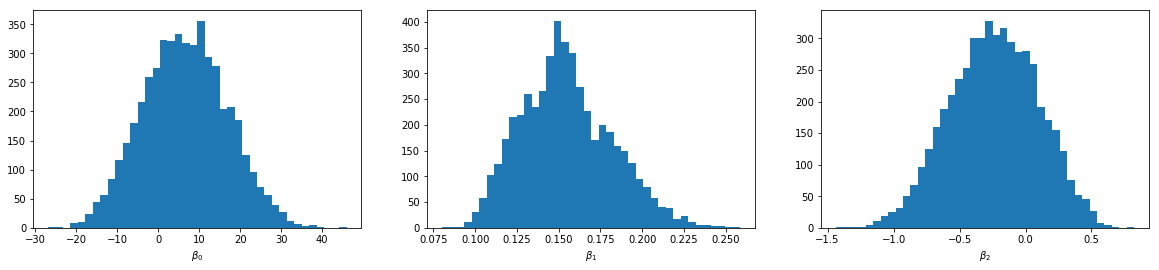

In [12]:
plt.figure(figsize=(20,4))

plt.subplot(131)
_ = plt.hist(beta_0, bins=40)
_ = plt.xlabel(r'$\beta_0$')

plt.subplot(132)
_ = plt.hist(beta_1, bins=40)
_ = plt.xlabel(r'$\beta_1$')

plt.subplot(133)
_ = plt.hist(beta_2, bins=40)
_ = plt.xlabel(r'$\beta_2$')


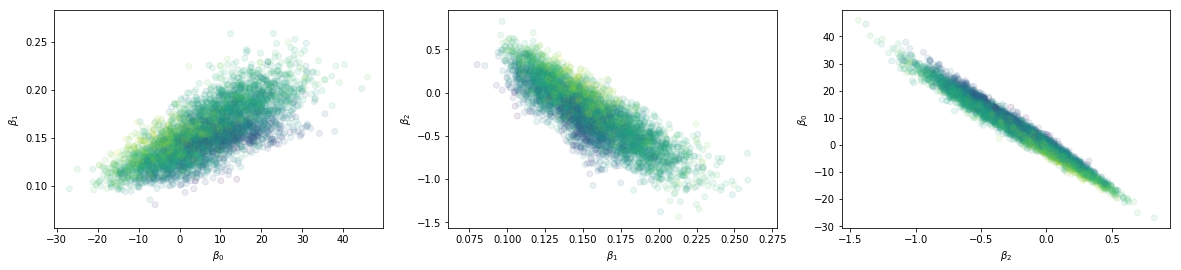

In [14]:
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.scatter(beta_0, beta_1, alpha=0.1, c=r2_train)
_ = plt.xlabel(r'$\beta_0$')
_ = plt.ylabel(r'$\beta_1$')

plt.subplot(132)
plt.scatter(beta_1, beta_2, alpha=0.1, c=r2_train)
_ = plt.xlabel(r'$\beta_1$')
_ = plt.ylabel(r'$\beta_2$')

plt.subplot(133)
plt.scatter(beta_2, beta_0, alpha=0.1, c=r2_train)
_ = plt.xlabel(r'$\beta_2$')
_ = plt.ylabel(r'$\beta_0$')

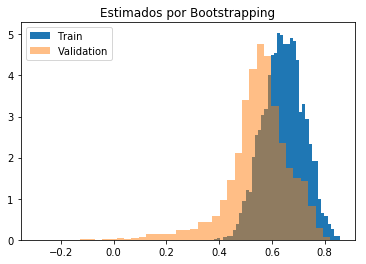

In [15]:
_ = plt.hist(r2_train, bins=40, density=True, label='Train')
_ = plt.hist(r2_validation, bins=40, alpha=0.5, density=True, label='Validation')

plt.title("Estimados por Bootstrapping")
plt.legend()

Y de esta manera podemos estimar los valores medios de los parámetros

In [16]:
print('beta 0 {} +/- {}'.format(beta_0.mean(), beta_0.std() ))
print('beta 1 {} +/- {}'.format(beta_1.mean(), beta_1.std() ))
print('beta 2 {} +/- {}'.format(beta_2.mean(), beta_2.std() ))

beta 0 6.550763005955128 +/- 10.241162408428698
beta 1 0.1547598676455271 +/- 0.027275814525656965
beta 2 -0.23860136781933397 +/- 0.33431493016934044


Cual son las principales diferencias entre training, validation and test?

- training: datos para encontrar los parámetros del modelo dado un método estadístico. En este caso los beta con mínimos cuadrados.
- validation: datos para tomar decisiones sobre el método estadístico y, en algunos casos, el modelo mismo. En este caso, descartar alguno de los coeficientes.
- test: datos independientes para medir el rendimiento de un modelo y un método estadístico determinado.